In [15]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import brightfish
import brightfish.environment as environment
import brightfish.fish as fish

In [16]:
partitioned_halves = environment.PartitionedHalves((51, 51), 100, 10001, initial_value=0.75, initial_half='left', static=False)

In [17]:
f = fish.BinocularFish(np.pi/2, (25, 25), static=True, set_point=0.5, max_diff=0.75, learning_rate=5e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})

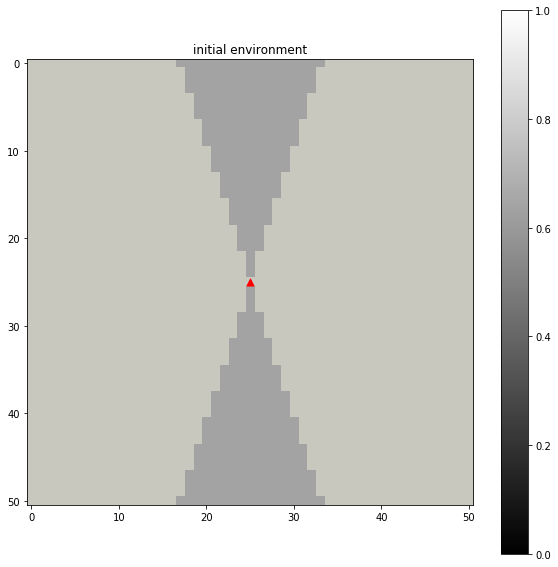

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=50)
eyes = np.zeros((51, 51))
eyes[f.right_eye((51, 51))] = 1.0
eyes[f.left_eye((51, 51))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('initial environment')
plt.show()

In [19]:
params = f.run(partitioned_halves, 1000)

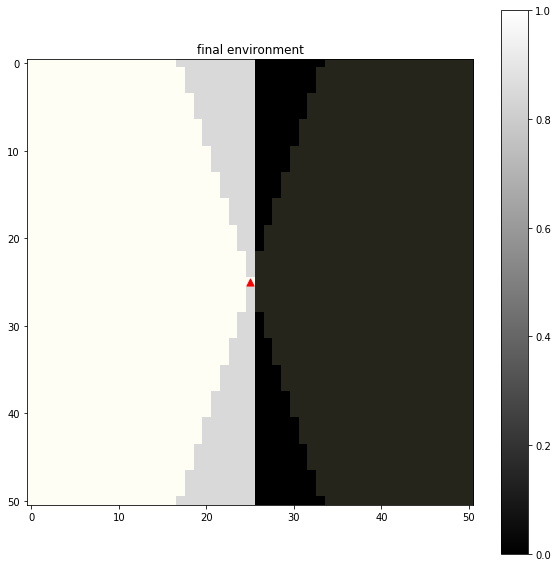

In [20]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(partitioned_halves.stage, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
t = mpl.markers.MarkerStyle(marker='>')
t._transform = t.get_transform().rotate_deg(np.degrees(f.heading))
plt.scatter([f.position[1]], [f.position[0]], c='r', marker=t, s=50)
eyes = np.zeros((51, 51))
eyes[f.right_eye((51, 51))] = 1.0
eyes[f.left_eye((51, 51))] = 1.0
plt.imshow(eyes, cmap='magma', alpha=0.15)
plt.title('final environment')
plt.show()

In [21]:
partitioned_halves = environment.PartitionedHalves((51, 51), 10001, 10001, initial_value=0.75, initial_half='left', static=False)

In [22]:
f = fish.BinocularFish(np.pi/2, (25, 25), static=True, set_point=0.5, max_diff=0.75, learning_rate=5e-2, p_move=0.2, move_dist={'mu': 5.0, 'sigma': 1.0})

In [23]:
control_params = f.run(partitioned_halves, 1000)

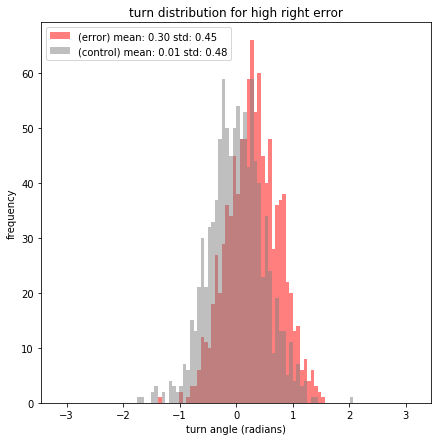

In [24]:
fig = plt.figure(figsize=(7, 7))
plt.hist(params['theta'], range=(-np.pi, np.pi), bins=100, color='red', alpha=0.5, label=f"(error) mean: {np.mean(params['theta']):.2f} std: {np.std(params['theta']):.2f}")
plt.hist(control_params['theta'], range=(-np.pi, np.pi), bins=100, color='gray', alpha=0.5, label=f"(control) mean: {np.mean(control_params['theta']):.2f} std: {np.std(control_params['theta']):.2f}")
plt.title('turn distribution for high right error')
plt.xlabel('turn angle (radians)')
plt.ylabel('frequency')
plt.legend(loc='best')
plt.show()

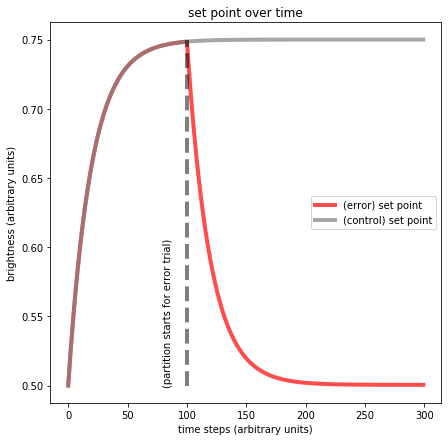

In [25]:
fig = plt.figure(figsize=(7, 7))
plt.plot(params['set_point'][:300], alpha=0.7, lw=4, label='(error) set point', color='red')
plt.plot(control_params['set_point'][:300], alpha=0.7, lw=4, label='(control) set point', color='gray')
plt.legend(loc='best')
plt.ylabel('brightness (arbitrary units)')
plt.xlabel('time steps (arbitrary units)')
plt.text(80, 0.5, '(partition starts for error trial)', rotation='vertical')
plt.plot([100, 100], [0.5, 0.75], lw=4, color='black', linestyle='--', alpha=0.5)
plt.title('set point over time')
plt.show()